In [98]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mplfinance.original_flavor import candlestick_ohlc #candles plots
import matplotlib.dates as mpl_dates
from yahoo_fin.stock_info import * #database docs
from yahoo_fin import news
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


In [46]:
df = get_data('ETH-USD', start_date='2015-08-07') #it starts from 2017 bec it does not provides date from 2015 means it use to be?

(THIS IS ALL PUBLIC STOCK DATA)

In [25]:
df = df.drop(columns=['ticker','adjclose'])

In [42]:
df

,open,high,low,close,adjclose,volume,ticker
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984,ETH-USD
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984,ETH-USD
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992,ETH-USD
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936,ETH-USD
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984,ETH-USD
...,...,...,...,...,...,...,...
2022-06-07,1859.333740,1862.914917,1729.413574,1814.048340,1814.048340,24020076750,ETH-USD
2022-06-08,1814.100708,1830.676025,1770.231201,1793.572266,1793.572266,18041476023,ETH-USD
2022-06-09,1793.512817,1827.293091,1779.867554,1789.826050,1789.826050,12013083393,ETH-USD
2022-06-10,1789.689941,1797.607788,1663.433960,1665.042236,1665.042236,18504740451,ETH-USD


In [27]:
df.describe()

,open,high,low,close,volume
count,1676.000000,1676.000000,1676.000000,1676.000000,1.676000e+03
mean,1098.620569,1134.783140,1057.309289,1099.121400,1.271230e+10
std,1252.675779,1291.090664,1208.013197,1252.068444,1.111727e+10
min,84.279694,85.342743,82.829887,84.308296,6.217330e+08
25%,200.496155,205.684937,195.705379,200.522747,3.577051e+09
50%,412.479324,420.367508,399.759186,412.539307,1.009601e+10
75%,1904.183136,1970.725159,1808.743896,1901.912811,1.811068e+10
max,4810.071289,4891.704590,4718.039062,4812.087402,8.448291e+10


In [28]:
df.head()

,open,high,low,close,volume
2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984


In [141]:
get_market_status() #closed for now

'CLOSED'

In [67]:
news.get_yf_rss("ETH-USD") #news

[{'summary': 'Stronger than expected CPI lifted the greenback',
  'summary_detail': {'type': 'text/html',
   'language': None,
   'base': 'https://feeds.finance.yahoo.com/rss/2.0/headline?s=ETH-USD&region=US&lang=en-US',
   'value': 'Stronger than expected CPI lifted the greenback'},
  'id': 'd6ebb296-f3f9-3827-9823-7b23fcc47e30',
  'guidislink': False,
  'links': [{'rel': 'alternate',
    'type': 'text/html',
    'href': 'https://finance.yahoo.com/news/usd-cad-exchange-rate-prediction-214648726.html?.tsrc=rss'}],
  'link': 'https://finance.yahoo.com/news/usd-cad-exchange-rate-prediction-214648726.html?.tsrc=rss',
  'published': 'Fri, 10 Jun 2022 21:46:48 +0000',
  'published_parsed': time.struct_time(tm_year=2022, tm_mon=6, tm_mday=10, tm_hour=21, tm_min=46, tm_sec=48, tm_wday=4, tm_yday=161, tm_isdst=0),
  'title': 'USD/CAD Exchange Rate Prediction – The Dollar Surged on Higher Treasury Yields',
  'title_detail': {'type': 'text/plain',
   'language': None,
   'base': 'https://feeds.f

In [87]:
	
get_holders('ETH-USD')

{'Major Holders':                 0                    1
 0  Previous Close              1664.76
 1            Open              1664.76
 2     Day's Range  1,583.57 - 1,679.08
 3   52 Week Range  1,583.57 - 4,891.70
 4      Start Date           2015-08-07
 5       Algorithm                  NaN,
 'Direct Holders (Forms 3 and 4)':                               0            1
 0                    Market Cap     194.394B
 1            Circulating Supply      121.13M
 2                    Max Supply          NaN
 3                        Volume  20523706368
 4                 Volume (24hr)       20.52B
 5  Volume (24hr) All Currencies       20.52B}

In [94]:
(df.max(),
df.min(),
df.median)

(open        4810.071289
 high         4891.70459
 low         4718.039062
 close       4812.087402
 adjclose    4812.087402
 volume      84482912776
 ticker          ETH-USD
 dtype: object,
 open        84.279694
 high        85.342743
 low         82.829887
 close       84.308296
 adjclose    84.308296
 volume      621732992
 ticker        ETH-USD
 dtype: object,
 <bound method NDFrame._add_numeric_operations.<locals>.median of                    open         high          low        close     adjclose  \
 2017-11-09   308.644989   329.451996   307.056000   320.884003   320.884003   
 2017-11-10   320.670990   324.717987   294.541992   299.252991   299.252991   
 2017-11-11   298.585999   319.453003   298.191986   314.681000   314.681000   
 2017-11-12   314.690002   319.153015   298.513000   307.907990   307.907990   
 2017-11-13   307.024994   328.415009   307.024994   316.716003   316.716003   
 ...                 ...          ...          ...          ...          ...   
 2022-0

In [95]:
get_live_price('ETH-USD')

1605.29296875

In [97]:
get_stats('ETH-USD')

,Attribute,Value
0,Market Cap,194.443B
1,Circulating Supply,121.13M
2,Max Supply,NaN
3,Volume,20549548032
4,Volume (24hr),20.55B
5,Volume (24hr) All Currencies,20.55B


In [144]:
df['100ma'] = df['close'].rolling(window = 100, min_periods = 0).max()

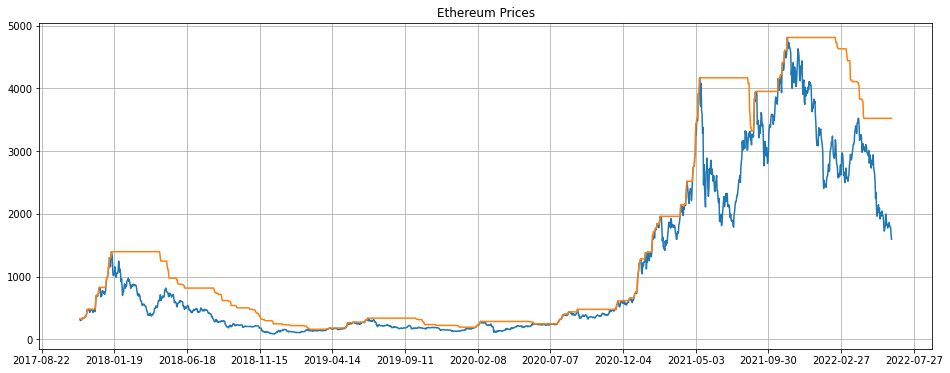

In [145]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.index, df.close)
ax.plot(df.index, df['100ma'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Ethereum Prices')
plt.grid()
plt.show()

## Plot Data by using olhc and pd and plot fig

In [147]:
stk = df[(df.index > '2021-04-01') & (df.index <= '2021-09-12')] #set rang
stk['date'] = stk.index  #set date = index

stk = stk.loc[:, ['date','open', 'high', 'low', 'close']] #group data
stk['date'] = pd.to_datetime(stk['date']) #extract dates
stk['date'] = stk['date'].apply(mpl_dates.date2num) #coverting wired dates data into readable dates
stk = stk.astype(float) #datatype

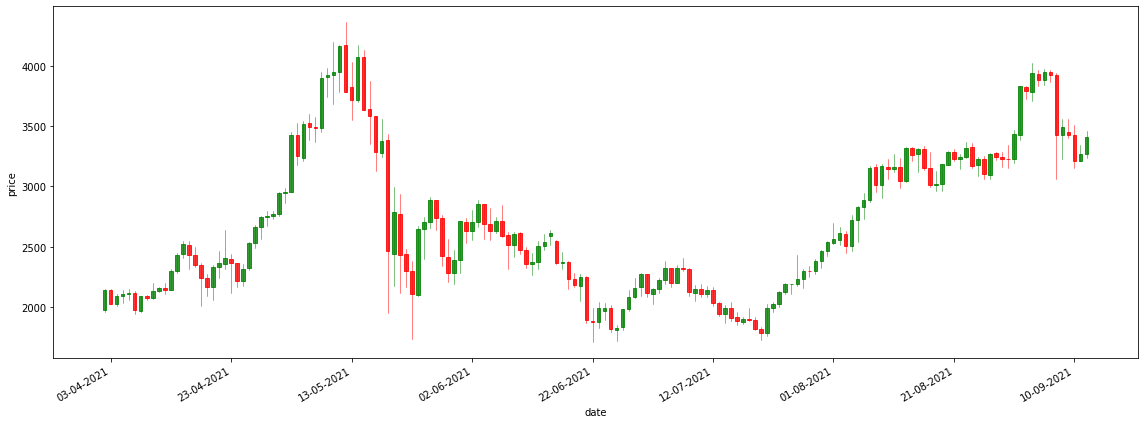

In [143]:
fig, ax = plt.subplots(figsize = (16,6))
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
ax.set_xlabel('date')
ax.set_ylabel('price')
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

plt.show()
